# Comparison of Full vs Profile Likelihood Methods



### How to run the code

#### On local machine

Run `/benchmark/scripts/benchmark_speed.py`.

The output is stored in `/benchnmark/pickle_results/benchmark_results.pickle`. 


#### Run on cluster

To run this script on a cluster with Torque:

    cd jobfiles
    qsub jobfile_benchmark_speed.pbs

In [1]:
import numpy
import pickle
import pprint
pp = pprint.PrettyPrinter(indent=4)

from os.path import join
import matplotlib
import matplotlib.ticker
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
import seaborn as sns
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#matplotlib.font_manager._rebuild() 
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_style("ticks")
plt.rc('font', family='serif')
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
benchmark_dir = '..'
# base_filename = 'benchmark_speed_dense'
base_filename = 'benchmark_speed'
#base_filename = 'benchmark_speed_sparse_cg'
#base_filename = 'benchmark_speed_sparse_ncg'
results_filename = join(benchmark_dir, 'pickle_results', base_filename + '.pickle')

with open(results_filename, 'rb') as file:
    benchmark_result = pickle.load(file)
    
print('Config:')
pp.pprint(benchmark_result['config'])
print('')
print('Devices:')
pp.pprint(benchmark_result['devices'])
print('')
results = benchmark_result['results']
num_data = len(results)
print('num data: %d' % num_data)
print('')
date = benchmark_result['date']
print('date: %s' % date)

# Extract variables
data_sizes = benchmark_result['config']['data_sizes']
repeat = benchmark_result['config']['repeat']

opt_proc_time = {}
opt_proc_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
opt_proc_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

opt_wall_time = {}
opt_wall_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
opt_wall_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

cor_proc_time = {}
cor_proc_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
cor_proc_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

cor_wall_time = {}
cor_wall_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
cor_wall_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

det_proc_time = {}
det_proc_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
det_proc_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

det_wall_time = {}
det_wall_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
det_wall_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

trc_proc_time = {}
trc_proc_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
trc_proc_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

trc_wall_time = {}
trc_wall_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
trc_wall_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

sol_proc_time = {}
sol_proc_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
sol_proc_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

sol_wall_time = {}
sol_wall_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
sol_wall_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

lik_proc_time = {}
lik_proc_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
lik_proc_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

lik_wall_time = {}
lik_wall_time['full'] = numpy.zeros((num_data, repeat), dtype=float)
lik_wall_time['prof'] = numpy.zeros((num_data, repeat), dtype=float)

sigma = {}
sigma['full'] = numpy.zeros((num_data, repeat), dtype=float)
sigma['prof'] = numpy.zeros((num_data, repeat), dtype=float)

sigma0 = {}
sigma0['full'] = numpy.zeros((num_data, repeat), dtype=float)
sigma0['prof'] = numpy.zeros((num_data, repeat), dtype=float)

eq_sigma = {}
eq_sigma['full'] = numpy.zeros((num_data, repeat), dtype=float)
eq_sigma['prof'] = numpy.zeros((num_data, repeat), dtype=float)

eta = {}
eta['full'] = numpy.zeros((num_data, repeat), dtype=float)
eta['prof'] = numpy.zeros((num_data, repeat), dtype=float)

num_opt_iter = {}
num_opt_iter['full'] = numpy.zeros((num_data, repeat), dtype=float)
num_opt_iter['prof'] = numpy.zeros((num_data, repeat), dtype=float)

num_fun_eval = {}
num_fun_eval['full'] = numpy.zeros((num_data, repeat), dtype=float)
num_fun_eval['prof'] = numpy.zeros((num_data, repeat), dtype=float)

num_jac_eval = {}
num_jac_eval['full'] = numpy.zeros((num_data, repeat), dtype=float)
num_jac_eval['prof'] = numpy.zeros((num_data, repeat), dtype=float)

num_hes_eval = {}
num_hes_eval['full'] = numpy.zeros((num_data, repeat), dtype=float)
num_hes_eval['prof'] = numpy.zeros((num_data, repeat), dtype=float)

max_fun = {}
max_fun['full'] = numpy.zeros((num_data, repeat), dtype=float)
max_fun['prof'] = numpy.zeros((num_data, repeat), dtype=float)
max_fun_rel = numpy.zeros((num_data, repeat), dtype=float)

success = {}
success['full'] = numpy.zeros((num_data, repeat), dtype=float)
success['prof'] = numpy.zeros((num_data, repeat), dtype=float)

nnz = {}
nnz['full'] = numpy.zeros((num_data, repeat), dtype=float)
nnz['prof'] = numpy.zeros((num_data, repeat), dtype=float)

avg_row_nnz = {}
avg_row_nnz['full'] = numpy.zeros((num_data, repeat), dtype=float)
avg_row_nnz['prof'] = numpy.zeros((num_data, repeat), dtype=float)

density = {}
density['full'] = numpy.zeros((num_data, repeat), dtype=float)
density['prof'] = numpy.zeros((num_data, repeat), dtype=float)

sizes = numpy.zeros((num_data, ), dtype=float)

for i in range(num_data):
    
    sizes[i] = results[i]['full_likelihood'][0]['data']['size']
    
    #  Repeats of experiments
    for j in range(repeat):
        opt_proc_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['opt_proc_time']
        opt_proc_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['opt_proc_time']
        opt_wall_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['opt_wall_time']
        opt_wall_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['opt_wall_time']

        cor_proc_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['cor_proc_time']
        cor_proc_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['cor_proc_time']
        cor_wall_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['cor_wall_time']
        cor_wall_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['cor_wall_time']

        det_proc_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['det_proc_time']
        det_proc_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['det_proc_time']
        det_wall_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['det_wall_time']
        det_wall_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['det_wall_time']

        trc_proc_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['trc_proc_time']
        trc_proc_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['trc_proc_time']
        trc_wall_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['trc_wall_time']
        trc_wall_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['trc_wall_time']

        sol_proc_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['sol_proc_time']
        sol_proc_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['sol_proc_time']
        sol_wall_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['sol_wall_time']
        sol_wall_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['sol_wall_time']

        lik_proc_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['lik_proc_time']
        lik_proc_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['lik_proc_time']
        lik_wall_time['full'][i, j] = results[i]['full_likelihood'][j]['time']['lik_wall_time']
        lik_wall_time['prof'][i, j] = results[i]['prof_likelihood'][j]['time']['lik_wall_time']

        sigma['full'][i, j] = results[i]['full_likelihood'][j]['hyperparam']['sigma']
        sigma['prof'][i, j] = results[i]['prof_likelihood'][j]['hyperparam']['sigma']
        eq_sigma['full'][i, j] = results[i]['full_likelihood'][j]['hyperparam']['eq_sigma']
        eq_sigma['prof'][i, j] = results[i]['prof_likelihood'][j]['hyperparam']['eq_sigma']
        sigma0['full'][i, j] = results[i]['full_likelihood'][j]['hyperparam']['sigma0']
        sigma0['prof'][i, j] = results[i]['prof_likelihood'][j]['hyperparam']['sigma0']
        sigma['full'][i, j] = results[i]['full_likelihood'][j]['hyperparam']['sigma']
        sigma['prof'][i, j] = results[i]['prof_likelihood'][j]['hyperparam']['sigma']
        eta['full'][i, j] = results[i]['full_likelihood'][j]['hyperparam']['eta']
        eta['prof'][i, j] = results[i]['prof_likelihood'][j]['hyperparam']['eta']
        
        density['full'][i, j] = results[i]['full_likelihood'][j]['data']['density']
        density['prof'][i, j] = results[i]['prof_likelihood'][j]['data']['density']
        nnz['full'][i, j] = results[i]['full_likelihood'][j]['data']['nnz']
        nnz['prof'][i, j] = results[i]['prof_likelihood'][j]['data']['nnz']
        avg_row_nnz['full'][i, j] = results[i]['full_likelihood'][j]['data']['avg_row_nnz']
        avg_row_nnz['prof'][i, j] = results[i]['prof_likelihood'][j]['data']['avg_row_nnz']

        num_opt_iter['full'][i, j] = results[i]['full_likelihood'][j]['optimization']['num_opt_iter']
        num_opt_iter['prof'][i, j] = results[i]['prof_likelihood'][j]['optimization']['num_opt_iter']
        num_fun_eval['full'][i, j] = results[i]['full_likelihood'][j]['optimization']['num_fun_eval']
        num_fun_eval['prof'][i, j] = results[i]['prof_likelihood'][j]['optimization']['num_fun_eval']
        num_jac_eval['full'][i, j] = results[i]['full_likelihood'][j]['optimization']['num_jac_eval']
        num_jac_eval['prof'][i, j] = results[i]['prof_likelihood'][j]['optimization']['num_jac_eval']
        num_hes_eval['full'][i, j] = results[i]['full_likelihood'][j]['optimization']['num_hes_eval']
        num_hes_eval['prof'][i, j] = results[i]['prof_likelihood'][j]['optimization']['num_hes_eval']
        max_fun['full'][i] = results[i]['full_likelihood'][j]['optimization']['max_fun']

        max_fun_prof = results[i]['prof_likelihood'][j]['optimization']['max_fun']
        if isinstance(max_fun_prof, float):
            max_fun['prof'][i, j] = max_fun_prof
            max_fun_rel[i, j] = 1.0 - max_fun['prof'][i, j] / max_fun['full'][i, j]
        else:
            max_fun['prof'][i, j] = numpy.nan
            max_fun_rel[i, j] = numpy.nan
            
        #success['full'][i, j] = results[i]['full_likelihood']['optimization']['success']
        #success['prof'][i, j] = results[i]['prof_likelihood']['optimization']['success']

Config:
{   'B': None,
    'b': None,
    'data_sizes': array([ 64,  73,  84,  97, 111, 128, 147, 168]),
    'dimension': 2,
    'grid': True,
    'hyperbolic_coeff': None,
    'hyperparam_guesses': {'none': [0.1, 0.1], 'var': [1]},
    'imate_options': {   'none': {'method': 'cholesky'},
                         'var': {   'lanczos_degree': 30,
                                    'max_num_samples': 50,
                                    'method': 'slq',
                                    'min_num_samples': 10}},
    'kernel': 'Exponential',
    'kernel_threshold': 0.03,
    'noise_magnitude': 0.2,
    'optimization_method': {'none': 'Nelder-Mead', 'var': 'chandrupatla'},
    'polynomial_degree': 2,
    'profile_hyperparam': ['var', 'none'],
    'repeat': 1,
    'scale': 0.005,
    'sparse': True,
    'tol': 0.0001,
    'trigonometric_coeff': None,
    'verbose': False}

Devices:
{   'cuda_version': 'not found',
    'glearn_version': '0.15.3',
    'gpu_name': 'none',
    'imate_versi

In [3]:
def find_slope(x, y):
    """
    finds a in y = x**a
    """
    
    log2_x = numpy.log2(x)
    log2_y = numpy.log2(y)
    
    return numpy.polyfit(log2_x, log2_y, 1)[0]

In [4]:
# Plot Variables
plot_wall_time = False
full_color = '#0093FF'
prof_color = '#77B900'

# ========
# plot var
# ========

def plot_var(ax_, var, ylabel, title, ylog=False, error=True):

    if isinstance(var, dict):
        var_full_mean = numpy.mean(var['full'], axis=1)
        var_prof_mean = numpy.mean(var['prof'], axis=1)
        
        if error:
            var_full_std = numpy.std(var['full'], axis=1)
            var_prof_std = numpy.std(var['prof'], axis=1)
        else:
            var_full_std = None
            var_prof_std = None
        
        ax_.errorbar(sizes, var_full_mean, yerr=var_full_std, fmt='-o', color=full_color, label='full')
        ax_.errorbar(sizes, var_prof_mean, yerr=var_prof_std, fmt='-s', color=prof_color, label='profiled')
        
        handles,labels = ax_.get_legend_handles_labels()
        ax_.legend(handles, labels, fontsize='x-small')
    else:
        var_mean = numpy.mean(var, axis=1)
        
        if error:
            var_std = numpy.std(var, axis=1)
        else:
            var_std = None
            
        ax_.errorbar(sizes, var_mean, yerr=var_std, fmt='-o', color=full_color)

    ax_.set_xscale('log', base=2)
    if ylog:
        ax_.set_yscale('log', base=10)

    ax_.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax_.get_xaxis().get_major_formatter().labelOnlyBase = False
    ax_.set_xticks(sizes)

    ax_.set_ylabel(ylabel)
    ax_.set_title(title)

    ax_.set_xlabel(r'$n$')
    ax_.grid(axis='y', which='major')
    
# =========
# save plot
# =========

def save_plot(plt, name):
    
    plt.tight_layout()
    save_dir = 'svg_plots'
    filename_svg = name + '.svg'
    plt.savefig(join(benchmark_dir, save_dir, filename_svg), transparent=True, bbox_inches='tight')
    print('Plot saved to "%s".' % (filename_svg))

Plot saved to "benchmark_speed_proc_time.svg".


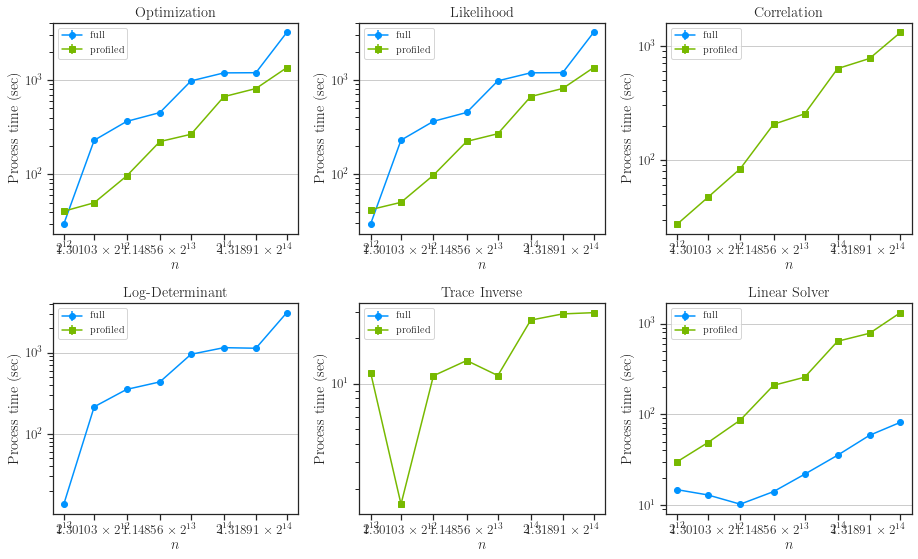

In [5]:
fig, ax = plt.subplots(figsize=(13, 8), nrows=2, ncols=3)

# Plot time
plot_var(ax[0, 0], opt_proc_time, 'Process time (sec)', 'Optimization', ylog=True)
plot_var(ax[0, 1], lik_proc_time, 'Process time (sec)', 'Likelihood', ylog=True)
plot_var(ax[0, 2], cor_proc_time, 'Process time (sec)', 'Correlation', ylog=True)
plot_var(ax[1, 0], det_proc_time, 'Process time (sec)', 'Log-Determinant', ylog=True)
plot_var(ax[1, 1], trc_proc_time, 'Process time (sec)', 'Trace Inverse', ylog=True)
plot_var(ax[1, 2], sol_proc_time, 'Process time (sec)', 'Linear Solver', ylog=True)

# Save plot
save_plot(plt, 'benchmark_speed_proc_time')

Plot saved to "benchmark_speed_wall_time.svg".


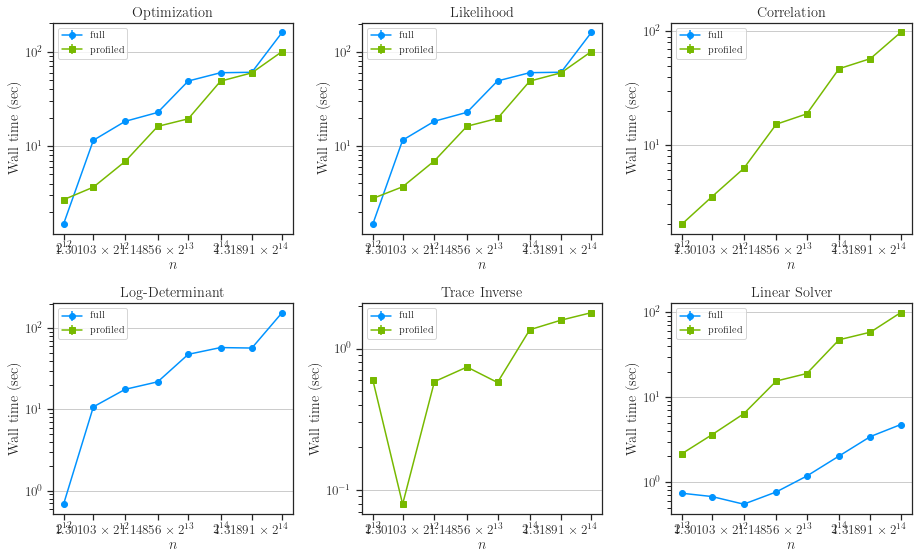

In [6]:
fig, ax = plt.subplots(figsize=(13, 8), nrows=2, ncols=3)

# Plot time
plot_var(ax[0, 0], opt_wall_time, 'Wall time (sec)', 'Optimization', ylog=True)
plot_var(ax[0, 1], lik_wall_time, 'Wall time (sec)', 'Likelihood', ylog=True)
plot_var(ax[0, 2], cor_wall_time, 'Wall time (sec)', 'Correlation', ylog=True)
plot_var(ax[1, 0], det_wall_time, 'Wall time (sec)', 'Log-Determinant', ylog=True)
plot_var(ax[1, 1], trc_wall_time, 'Wall time (sec)', 'Trace Inverse', ylog=True)
plot_var(ax[1, 2], sol_wall_time, 'Wall time (sec)', 'Linear Solver', ylog=True)

# Save plot
save_plot(plt, 'benchmark_speed_wall_time')

Plot saved to "benchmark_speed_hyperparam.svg".


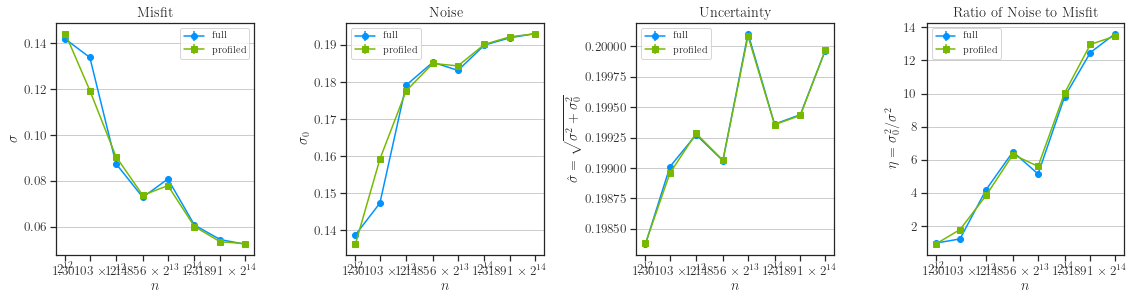

In [7]:
fig, ax = plt.subplots(figsize=(16, 4.4), nrows=1, ncols=4)

# Plot sigmas
plot_var(ax[0], sigma, r'$\sigma$', 'Misfit')
plot_var(ax[1], sigma0, r'$\sigma_0$', 'Noise')
plot_var(ax[2], eq_sigma, r'$\hat{\sigma} = \sqrt{\sigma^2 + \sigma_0^2}$', 'Uncertainty')
plot_var(ax[3], eta, r'$\eta = \sigma_0^2 / \sigma^2$', 'Ratio of Noise to Misfit')

# Save plot
save_plot(plt, 'benchmark_speed_hyperparam')

Plot saved to "benchmark_speed_iter.svg".


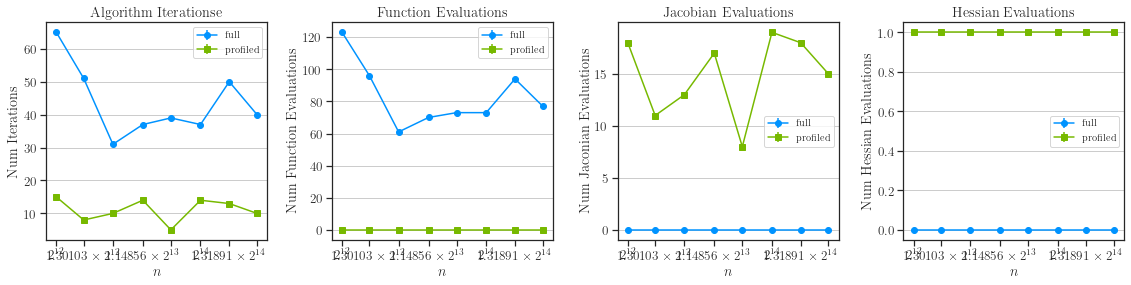

In [8]:
fig, ax = plt.subplots(figsize=(16, 4.2), nrows=1, ncols=4)

# Plot iterations
plot_var(ax[0], num_opt_iter, 'Num Iterations', 'Algorithm Iterationse')
plot_var(ax[1], num_fun_eval, 'Num Function Evaluations', 'Function Evaluations')
plot_var(ax[2], num_jac_eval, 'Num Jaconian Evaluations', 'Jacobian Evaluations')
plot_var(ax[3], num_hes_eval, 'Num Hessian Evaluations', 'Hessian Evaluations')

# Save plot
save_plot(plt, 'benchmark_speed_iter')

Plot saved to "benchmark_speed_sparcity.svg".


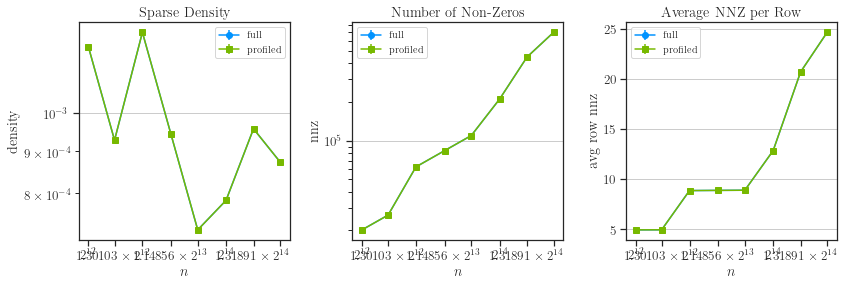

In [9]:
fig, ax = plt.subplots(figsize=(12, 4.2), nrows=1, ncols=3)

# Plot iterations
plot_var(ax[0], density, 'density', 'Sparse Density', ylog=True)
plot_var(ax[1], nnz, 'nnz', 'Number of Non-Zeros', ylog=True)
plot_var(ax[2], avg_row_nnz, 'avg row nnz', 'Average NNZ per Row')

# Save plot
save_plot(plt, 'benchmark_speed_sparcity')

/home/sia/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Plot saved to "benchmark_speed_posterior.svg".


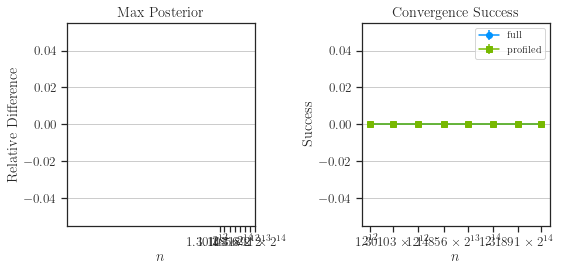

In [10]:
fig, ax = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)

# Plot iterations
plot_var(ax[0], max_fun_rel, 'Relative Difference', 'Max Posterior')
plot_var(ax[1], success, 'Success', 'Convergence Success')

# Save plot
save_plot(plt, 'benchmark_speed_posterior')

In [11]:
kernel_threshold = results[i]['full_likelihood'][0]['data']['kernel_threshold']
scale = results[i]['full_likelihood'][0]['hyperparam']['scale'][0]
r = -numpy.log(kernel_threshold)
d = r * scale
vol = numpy.pi * d**2
q = vol * sizes
print(q)

[ 3.95559535  5.14632998  6.81413105  9.08647378 11.89865485 15.82238139
 20.86827633 27.25652419]


In [12]:
avg_row_nnz['prof'][:, 0]

array([ 4.9375    ,  4.94520548,  8.85770975,  8.87671378,  8.89221654,
       12.84399414, 20.70160581, 24.64413265])